In [ ]:
!mkdir -p bert
!google-drive-ocamlfuse bert

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301782 sha256=a6bd9c7825978c5666d90a42fb438d75e086cf07381a8657ea54853189ec933f
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
!pip install sentence-transformers

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/bertword7.csv')
print(df.head())
df.shape

                                            CATEGORY  IDS  ...  Topic Doc_ID
0  政府及社会团体相关 政府机关相关 生活服务场所 乡镇以下级政府及事业单位 乡镇以下级政府及事...    0  ...      5      0
1                                     物流速递 政府及社会团体相关    1  ...     -1      1
2  其它农林牧渔基地 物流速递 汽车维修 公司 餐饮相关 餐饮相关 中餐厅 快餐厅 公交车站相关...    2  ...     -1      2
3                              路口名 餐饮相关 公证鉴定机构 公司 小学    3  ...     -1      3
4                                               餐饮相关    4  ...      6      4

[5 rows x 6 columns]


(1976, 6)

In [ ]:
df['count']=1
df.groupby('Topic').sum()

,IDS,NUMS,Doc_ID,count
Topic,,,,
-1,844675,256395,844675,848
0,176621,0,176621,158
1,110756,8375,110756,123
2,99039,35702,99039,162
3,104474,11910,104474,114
4,294441,134351,294441,242
5,224539,58726,224539,217
6,96755,71938,96755,112


In [ ]:
Doc=df['Doc_ID'].values.tolist()#0开始

In [ ]:
import numpy as np
embeddings=np.load('/content/drive/MyDrive/1976embeddings.npy')

In [ ]:
import pandas as pd
df_em = pd.DataFrame(embeddings)

In [ ]:
len(embeddings[0])

768

In [ ]:
df_em.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,0.324251,-0.303960,-0.531702,0.299873,0.403131,0.182741,-0.203073,0.259188,-0.102294,0.417810,-0.541918,-0.479155,0.266882,0.454165,0.536344,-0.054196,0.299348,-0.391373,0.031636,-0.004987,-0.461191,0.488423,0.315752,0.273275,0.019969,-0.078391,0.344190,-0.342963,-0.638342,-0.227884,-0.318753,-0.116704,-0.407289,-0.028392,-0.032911,0.017167,-0.627910,-0.277079,-0.196345,-0.313651,...,0.343724,-0.023806,-0.018464,0.304180,-0.192684,-0.012592,0.668172,1.329410,-0.305809,-0.485491,0.303751,0.074832,0.276671,0.242816,0.799134,-0.167131,0.025577,-0.172339,0.149740,0.230996,-0.414747,1.509676,0.382342,0.153262,0.107553,-0.698962,0.314527,-0.582511,3.478960,0.095922,0.908202,0.178191,0.379136,-0.456799,-0.218042,0.018265,-0.390030,0.624088,0.247547,0.089631
1,0.194804,-0.075738,-0.816784,0.084382,0.894680,0.032717,0.083127,0.237022,-0.303457,0.570775,-0.649234,0.326562,0.761550,-0.000053,0.832276,0.319308,0.439984,-0.515648,0.108328,-0.080528,-0.723561,0.150524,0.188107,0.183906,-0.068565,0.068626,0.454541,-0.065351,-0.271542,0.533624,-0.229604,0.108813,-0.547954,-0.262301,-0.168546,0.333304,-0.057097,0.159853,-0.253442,0.096077,...,0.703440,-0.663798,-0.470176,0.388028,-0.059861,0.329031,0.039035,1.148116,-0.352533,-0.544824,0.205626,-0.086523,-0.221198,-0.062135,0.229879,0.104211,-0.185633,-0.276297,-0.040830,0.455157,-0.431938,1.446994,0.087776,-0.000347,0.831411,-0.478754,0.282525,-0.081558,2.836067,0.272603,0.487547,0.188720,0.278953,-0.186489,0.001785,-0.709493,-0.654216,0.313993,0.250704,-0.023052
2,0.585309,0.003941,-0.367120,0.198844,0.128550,-0.232376,0.153291,0.271647,-0.253263,0.061247,-0.271727,-0.833326,0.271669,0.431639,0.794373,0.166208,0.616687,-0.208543,0.219052,0.200490,-0.243154,0.540085,-0.034937,-0.044356,-0.168746,0.370128,0.341564,-0.601410,-0.267817,-0.240232,-0.016591,-0.190077,-0.354367,-0.106480,0.396099,-0.091455,-0.317939,-0.097433,-0.582083,-0.296914,...,-0.037693,0.186048,0.184238,0.547793,0.155288,-0.003441,0.063999,0.647966,-0.209710,-0.741342,0.400027,-0.090959,0.540371,-0.015040,0.709681,-0.292053,-0.141361,-0.313063,0.172635,0.569129,-0.624748,1.265876,0.065454,-0.135023,0.208191,-0.574641,-0.314702,-0.107898,2.831677,0.413751,0.968893,0.287001,0.118327,-0.006438,-0.270504,0.438914,-0.468461,0.776937,0.563485,0.124479
3,0.240405,-0.196801,-0.402898,0.247874,0.483697,-0.058736,0.034119,0.416854,0.029818,0.397402,-0.528784,-0.128445,0.582093,-0.058118,0.747407,-0.097186,0.758347,-0.035066,-0.271833,0.002676,-0.170849,0.676712,0.175323,0.380564,0.024691,0.182161,-0.027836,0.043075,-0.126478,0.052623,0.144590,-0.169166,-0.658048,0.084088,-0.199635,0.214226,-0.135041,0.364457,-0.167072,-0.286666,...,0.360025,-0.102896,-0.495575,0.391058,-0.184295,-0.133550,0.077765,1.054018,-0.038870,-0.374558,-0.228220,0.190065,0.093874,-0.365411,0.831343,-0.217639,-0.134534,-0.436300,0.471186,0.383684,-0.766465,1.323396,0.070615,-0.319159,0.331997,-0.628262,-0.197321,-0.172375,2.611543,0.164597,0.628817,-0.264465,0.525177,-0.557427,-0.285304,-0.266767,-0.578782,0.883180,0.213166,0.236929
4,0.031030,0.111539,-0.963593,0.026597,0.310630,-0.171762,-0.009470,0.504058,-0.045494,0.823777,-0.580461,0.066050,1.256109,-0.120481,0.846574,0.016310,0.107999,-0.514714,0.177145,-0.175726,-0.038839,0.442815,0.231700,-0.226208,-0.020234,0.343268,0.153981,0.051112,-0.281343,0.166330,0.344367,-0.292234,-0.137696,-0.084448,0.303783,0.157593,0.242950,0.545282,-0.102566,-0.250256,...,0.802388,0.212225,-0.244977,-0.037442,0.049027,0.692438,0.175012,1.243459,0.729994,-0.672076,-0.250454,0.167622,0.104351,0.051193,-0.424587,-0.175754,-0.368136,-0.485715,0.212069,0.118099,-0.331234,1.044600,0.046330,-0.212750,0.976813,-0.568081,0.069392,-0.175451,1.978568,0.213631,0.424

In [ ]:
df.head()

,CATEGORY,IDS,NUMS,SUBTYPE,Topic,Doc_ID,count
0,政府及社会团体相关 政府机关相关 生活服务场所 乡镇以下级政府及事业单位 乡镇以下级政府及事...,0,11,政府及社会团体相关 政府机关 生活服务场所 政府机关 政府机关 政府机关 临街院门 物流速递...,5,0,1
1,物流速递 政府及社会团体相关,1,2,物流速递 政府及社会团体相关,-1,1,1
2,其它农林牧渔基地 物流速递 汽车维修 公司 餐饮相关 餐饮相关 中餐厅 快餐厅 公交车站相关...,2,27,农林牧渔基地 物流速递 汽车维修 公司 餐饮相关场所 餐饮相关场所 中餐厅 快餐厅 公交车站...,-1,2,1
3,路口名 餐饮相关 公证鉴定机构 公司 小学,3,5,交通地名 餐饮相关场所 公检法机构 公司 学校,-1,3,1
4,餐饮相关,4,1,餐饮相关场所,6,4,1


In [ ]:
def get_list(ID):
  return(embeddings[ID])

In [ ]:
df['list']=df.apply(lambda x:get_list(x['Doc_ID']),axis=1)
df.head()

,CATEGORY,IDS,NUMS,SUBTYPE,Topic,Doc_ID,count,list
0,政府及社会团体相关 政府机关相关 生活服务场所 乡镇以下级政府及事业单位 乡镇以下级政府及事...,0,11,政府及社会团体相关 政府机关 生活服务场所 政府机关 政府机关 政府机关 临街院门 物流速递...,5,0,1,"[0.3242509, -0.30395952, -0.53170204, 0.299872..."
1,物流速递 政府及社会团体相关,1,2,物流速递 政府及社会团体相关,-1,1,1,"[0.19480392, -0.07573767, -0.81678367, 0.08438..."
2,其它农林牧渔基地 物流速递 汽车维修 公司 餐饮相关 餐饮相关 中餐厅 快餐厅 公交车站相关...,2,27,农林牧渔基地 物流速递 汽车维修 公司 餐饮相关场所 餐饮相关场所 中餐厅 快餐厅 公交车站...,-1,2,1,"[0.58530915, 0.00394079, -0.3671201, 0.1988441..."
3,路口名 餐饮相关 公证鉴定机构 公司 小学,3,5,交通地名 餐饮相关场所 公检法机构 公司 学校,-1,3,1,"[0.24040478, -0.19680066, -0.40289846, 0.24787..."
4,餐饮相关,4,1,餐饮相关场所,6,4,1,"[0.031029541, 0.11153935, -0.96359277, 0.02659..."


In [ ]:
#降维
import umap
umap_embeddings = umap.UMAP(n_neighbors=5,n_components=15,metric='cosine').fit_transform(embeddings)
umap_embeddings.shape

(1976, 15)

In [ ]:
def get_umap_list(ID):
  return(umap_embeddings[ID])
df['umap']=df.apply(lambda x:get_umap_list(x['Doc_ID']),axis=1)

In [ ]:
embeddings.shape

(1976, 768)

In [ ]:
# df.groupby('Topic').mean()
#这里是有降维的
df_1=df[df['Topic']==-1]['umap'].mean()
df0=df[df['Topic']==0]['umap'].mean()
df1=df[df['Topic']==1]['umap'].mean()
df2=df[df['Topic']==2]['umap'].mean()
df3=df[df['Topic']==3]['umap'].mean()
df4=df[df['Topic']==4]['umap'].mean()
df5=df[df['Topic']==5]['umap'].mean()
df6=df[df['Topic']==6]['umap'].mean()
alldf=[df_1,df0,df1,df2,df3,df4,df5,df6]
names=['Other','Water','Scenic','University','Company','Residence','Public services','Business']
data =pd.DataFrame(np.array(alldf).T,columns=names)
data.corr()

,Other,Water,Scenic,University,Company,Residence,Public services,Business
Other,1.000000,-0.536343,0.801053,0.838529,0.770569,0.908913,0.965172,0.937160
Water,-0.536343,1.000000,-0.616363,-0.663078,-0.728197,-0.634541,-0.676933,-0.629691
Scenic,0.801053,-0.616363,1.000000,0.818121,0.691984,0.678163,0.750295,0.841683
University,0.838529,-0.663078,0.818121,1.000000,0.715146,0.701391,0.816860,0.779206
Company,0.770569,-0.728197,0.691984,0.715146,1.000000,0.693495,0.825015,0.680220
Residence,0.908913,-0.634541,0.678163,0.701391,0.693495,1.000000,0.911671,0.934959
Public services,0.965172,-0.676933,0.750295,0.816860,0.825015,0.911671,1.000000,0.909329
Business,0.937160,-0.629691,0.841683,0.779206,0.680220,0.934959,0.909329,1.000000


In [ ]:
data.corr().to_csv('/content/drive/MyDrive/corrdata5_15.csv')

In [ ]:
# df.groupby('Topic').mean()
#这里是没有降维的
df_1=df[df['Topic']==-1]['list'].mean()
df0=df[df['Topic']==0]['list'].mean()
df1=df[df['Topic']==1]['list'].mean()
df2=df[df['Topic']==2]['list'].mean()
df3=df[df['Topic']==3]['list'].mean()
df4=df[df['Topic']==4]['list'].mean()
df5=df[df['Topic']==5]['list'].mean()
df6=df[df['Topic']==6]['list'].mean()

In [ ]:
alldf=[df_1,df0,df1,df2,df3,df4,df5,df6]
names=['Other','Water','Scenic','University','Company','Residence','Public services','Business']
data =pd.DataFrame(np.array(alldf).T,columns=names)

In [ ]:
data.to_csv('/content/drive/MyDrive/corrdata.csv')

In [ ]:
data.corr()

,Other,Water,Scenic,University,Company,Residence,Public services,Business
Other,1.000000,0.471132,0.941804,0.984422,0.973496,0.988867,0.991136,0.989915
Water,0.471132,1.000000,0.407710,0.412609,0.468841,0.380926,0.375971,0.405936
Scenic,0.941804,0.407710,1.000000,0.940205,0.920453,0.936237,0.939123,0.937760
University,0.984422,0.412609,0.940205,1.000000,0.963041,0.973283,0.979685,0.975980
Company,0.973496,0.468841,0.920453,0.963041,1.000000,0.948581,0.961539,0.951497
Residence,0.988867,0.380926,0.936237,0.973283,0.948581,1.000000,0.991671,0.990498
Public services,0.991136,0.375971,0.939123,0.979685,0.961539,0.991671,1.000000,0.987014
Business,0.989915,0.405936,0.937760,0.975980,0.951497,0.990498,0.987014,1.000000


In [ ]:
data.corr().to_csv('/content/drive/MyDrive/corr.csv')

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/GridData.csv')
df.shape

(1976, 4)

In [ ]:
df.head()

,CATEGORY,IDS,NUMS,SUBTYPE
0,政府及社会团体相关 政府机关相关 生活服务场所 乡镇以下级政府及事业单位 乡镇以下级政府及事...,0,11,政府及社会团体相关 政府机关 生活服务场所 政府机关 政府机关 政府机关 临街院门 物流速递...
1,物流速递 政府及社会团体相关,1,2,物流速递 政府及社会团体相关
2,其它农林牧渔基地 物流速递 汽车维修 公司 餐饮相关 餐饮相关 中餐厅 快餐厅 公交车站相关...,2,27,农林牧渔基地 物流速递 汽车维修 公司 餐饮相关场所 餐饮相关场所 中餐厅 快餐厅 公交车站...
3,路口名 餐饮相关 公证鉴定机构 公司 小学,3,5,交通地名 餐饮相关场所 公检法机构 公司 学校
4,餐饮相关,4,1,餐饮相关场所


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-chinese')#('distilbert-base-nli-mean-tokens')

Exception when trying to download https://sbert.net/models/bert-base-chinese.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/bert-base-chinese.zip not found. Try to create it from scratch
Try to create Transformer Model bert-base-chinese with mean pooling


In [ ]:
tdata=[]
for i in df['SUBTYPE'].values.tolist():
  tdata.append(str(i))

In [ ]:
!nvidia-smi

Tue Jan  5 09:14:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    30W /  70W |   2045MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
embeddings = model.encode(tdata, show_progress_bar=True)

In [ ]:
import numpy as np
np.save('/content/bert/1976embeddings.npy',embeddings)

In [ ]:
import numpy as np
embeddings=np.load('/content/drive/MyDrive/1976embeddings.npy')

In [ ]:
emdeddings=np.load('/content/drive/MyDrive/embeddings.npy')
embeddings.shape

(1976, 768)

In [ ]:
embeddings.shape

(1976, 768)

In [ ]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15,n_components=70,metric='cosine').fit_transform(embeddings)

In [ ]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=6,metric='euclidean',                      
cluster_selection_method='eom').fit(umap_embeddings)
len(set(cluster.labels_))

11

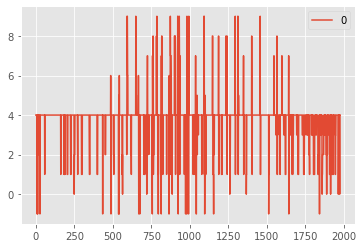

In [ ]:
import pandas as pd
df = pd.DataFrame(cluster.labels_)
df.plot()

In [ ]:
df.head()

,0
0,4
1,4
2,4
3,4
4,4


In [ ]:
df.groupby(0).size()

0
-1      27
 0      12
 1     158
 2      61
 3      48
 4    1588
 5       7
 6      12
 7      28
 8      17
 9      18
dtype: int64

In [ ]:
umap_embeddings.shape

(1976, 70)

In [ ]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=6,metric='euclidean',                      
cluster_selection_method='eom').fit(umap_embeddings)
len(set(cluster.labels_))

8

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')#将背景颜色改为。。

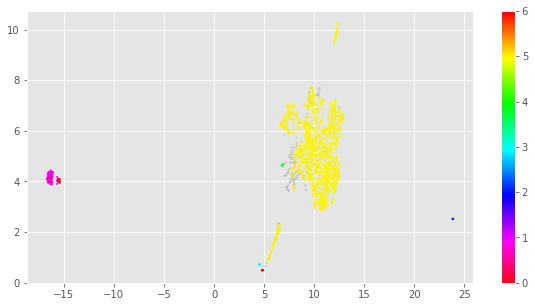

In [ ]:
# Prepare data
import pandas as pd
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(10, 5))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=2, cmap='hsv_r')
plt.colorbar()
# plt.savefig('/content/drive/MyDrive/bertword70_31.svg')
plt.savefig('/content/drive/MyDrive/bertword2021.svg')

In [ ]:
cluster.labels_

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
df['Topic'] = cluster.labels_

In [ ]:
df['Doc_ID'] = range(len(df))

In [ ]:
df=df.fillna("")

In [ ]:
# docs_df=pd.read_csv('/content/drive/MyDrive/bertword310105.csv')
# df=docs_df

In [ ]:
docs_per_topic = df.groupby(['Topic'], as_index = False).agg({'SUBTYPE': ' '.join})

In [ ]:
docs_per_topic.shape

In [ ]:
docs_per_topic.head()

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.SUBTYPE.values, m=df.shape[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .SUBTYPE
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "SUBTYPE": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(df); topic_sizes.head(10)

,Topic,Size
4,4,1585
1,1,158
6,6,91
2,2,61
3,3,51
0,0,12
7,7,12
5,5,6


In [ ]:
len(set(df['Topic'].values.tolist()))

8

In [ ]:
top_n_words[7][:10]

[('自然地名', 0.16695116171599933),
 ('港口码头', 0.07894615929089324),
 ('高尔夫相关', 0.0),
 ('天文馆', 0.0),
 ('大众特约销售', 0.0),
 ('大众特约维修', 0.0),
 ('外国餐厅', -0.0),
 ('外国机构', 0.0),
 ('培训机构', -0.0),
 ('地铁站', 0.0)]

In [ ]:
top_n_words[6][:10]

[('风景名胜相关', 0.029006695808003684),
 ('公园广场', 0.013974440551682829),
 ('售票处', 0.010524477281927978),
 ('港口码头', 0.007128720353879166),
 ('农林牧渔基地', 0.004288471194352906),
 ('展览馆', 0.0036093491103563937),
 ('会展中心', 0.0033492413885522847),
 ('博物馆', 0.003257483306880364),
 ('公用电话', 0.0028883027979734904),
 ('人才市场', 0.00288460020796483)]

In [ ]:
top_n_words[0][:10]

[('高尔夫相关', 0.0),
 ('奥迪特约维修', 0.0),
 ('奔驰特约维修', 0.0),
 ('奇瑞特约销售', 0.0),
 ('奇瑞特约维修', 0.0),
 ('天文馆', 0.0),
 ('大众特约销售', 0.0),
 ('大众特约维修', 0.0),
 ('外国餐厅', -0.0),
 ('外国机构', 0.0)]

In [ ]:
top_n_words[1][:10]

[('高尔夫相关', nan),
 ('商场', nan),
 ('奇瑞特约销售', nan),
 ('奇瑞特约维修', nan),
 ('天文馆', nan),
 ('大众特约销售', nan),
 ('大众特约维修', nan),
 ('外国餐厅', nan),
 ('外国机构', nan),
 ('培训机构', nan)]

In [ ]:
top_n_words[2][:10]

[('高尔夫相关', nan),
 ('商场', nan),
 ('奇瑞特约销售', nan),
 ('奇瑞特约维修', nan),
 ('天文馆', nan),
 ('大众特约销售', nan),
 ('大众特约维修', nan),
 ('外国餐厅', nan),
 ('外国机构', nan),
 ('培训机构', nan)]

In [ ]:
top_n_words[3][:10]

[('摩托车服务相关', 0.005800248507882652),
 ('购物相关场所', 0.002481645818840133),
 ('综合市场', 0.002190413878195151),
 ('超级市场', 0.0020630456020089933),
 ('普通地名', 0.0019683654107277176),
 ('宝马特约维修', 0.001959968728866961),
 ('婴儿服务场所', 0.001679455877153459),
 ('服装鞋帽皮具店', 0.0016438951043046923),
 ('工商税务机构', 0.0015355313920616689),
 ('工厂', 0.0014567059983814604)]

In [ ]:
top_n_words[4][:10]

[('保险公司', 0.0012792250831333537),
 ('工厂', 0.0012545415011894214),
 ('加油站', 0.0012494017898650454),
 ('火车站', 0.0012465775745541),
 ('邮局', 0.0012442489022766042),
 ('汽车租赁', 0.0012391160293709859),
 ('甜品店', 0.001237883818710092),
 ('影剧院', 0.0012300992161805796),
 ('工商税务机构', 0.0012244484252401451),
 ('度假疗养场所', 0.0012227789467106908)]

In [ ]:
top_n_words[5][:10]

[('风景名胜相关', 0.27963289483974774),
 ('高尔夫相关', 0.0),
 ('商场', 0.0),
 ('奇瑞特约销售', 0.0),
 ('奇瑞特约维修', 0.0),
 ('天文馆', 0.0),
 ('大众特约销售', 0.0),
 ('大众特约维修', 0.0),
 ('外国餐厅', -0.0),
 ('外国机构', 0.0)]

In [ ]:
docs_df.to_csv('/content/bert/bertword310105.csv',index=None)

In [ ]:
docs_df=pd.read_csv('/content/drive/MyDrive/bertword310105.csv')

In [ ]:
docs_df.head()

,CATEGORY,IDS,NUMS,SUBTYPE,Topic,Doc_ID
0,政府及社会团体相关 政府机关相关 生活服务场所 乡镇以下级政府及事业单位 乡镇以下级政府及事...,0,11,政府及社会团体相关 政府机关 生活服务场所 政府机关 政府机关 政府机关 临街院门 物流速递...,21,0
1,物流速递 政府及社会团体相关,1,2,物流速递 政府及社会团体相关,-1,1
2,其它农林牧渔基地 物流速递 汽车维修 公司 餐饮相关 餐饮相关 中餐厅 快餐厅 公交车站相关...,2,27,农林牧渔基地 物流速递 汽车维修 公司 餐饮相关场所 餐饮相关场所 中餐厅 快餐厅 公交车站...,-1,2
3,路口名 餐饮相关 公证鉴定机构 公司 小学,3,5,交通地名 餐饮相关场所 公检法机构 公司 学校,-1,3
4,餐饮相关,4,1,餐饮相关场所,10,4


In [ ]:
top_n_words[4][:10]

In [ ]:
from numpy import isnan
# where_are_NaNs = isnan(tf_idf)
# tf_idf[where_are_NaNs] = 0
tf_idf[np.isnan(tf_idf)] = 0

In [ ]:
docs_df=df
from sklearn.metrics.pairwise import cosine_similarity
for i in range(20):
    # Calculate cosine similarity
    tmp=tf_idf.T
    tmp[np.isnan(tmp)] = 0
    #缺失值处理
    similarities = cosine_similarity(tmp)
    np.fill_diagonal(similarities, 0)

    # Extract label to merge into and from where
    topic_sizes = docs_df.groupby(['Topic']).count().sort_values("SUBTYPE", ascending=False).reset_index()
    topic_to_merge = topic_sizes.iloc[-1].Topic
    topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

    # Adjust topics
    docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
    old_topics = docs_df.sort_values("Topic").Topic.unique()
    map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
    docs_df.Topic = docs_df.Topic.map(map_topics)
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'SUBTYPE': ' '.join})

    # Calculate new topic words
    m=df.shape[0]
    tf_idf, count = c_tf_idf(docs_per_topic.SUBTYPE.values, m)
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

In [ ]:
docs_df.head()

In [ ]:
set(docs_df['Topic'].values.tolist())

In [ ]:
docs_df.to_csv('/content/bert/bertword7.csv',index=None)